In [ ]:
from definitions import *

import data, figures

from mpl_stylesheets import STYLE_SHEETS_PATHS
from utils import plotly_utils

plt.style.use(STYLE_SHEETS_PATHS)

In [22]:

bfield_data = pd.read_csv(data.DIR_PATH / 'B_field_qpole.csv')
bfield_data
# Convert from m to mm
bfield_data['z'] *= 1e3
bfield_data['x'] *= 1e3
bfield_data['y'] *= 1e3

In [23]:
bfield_data['z'].min(), bfield_data['z'].max(), bfield_data['z'].max() - bfield_data['z'].min()/100

(-93.81300000499989, 93.81300000499989, 94.75113000504989)

Number of points in XY plane at Z=0: 7200


(-24.0, 24.0)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

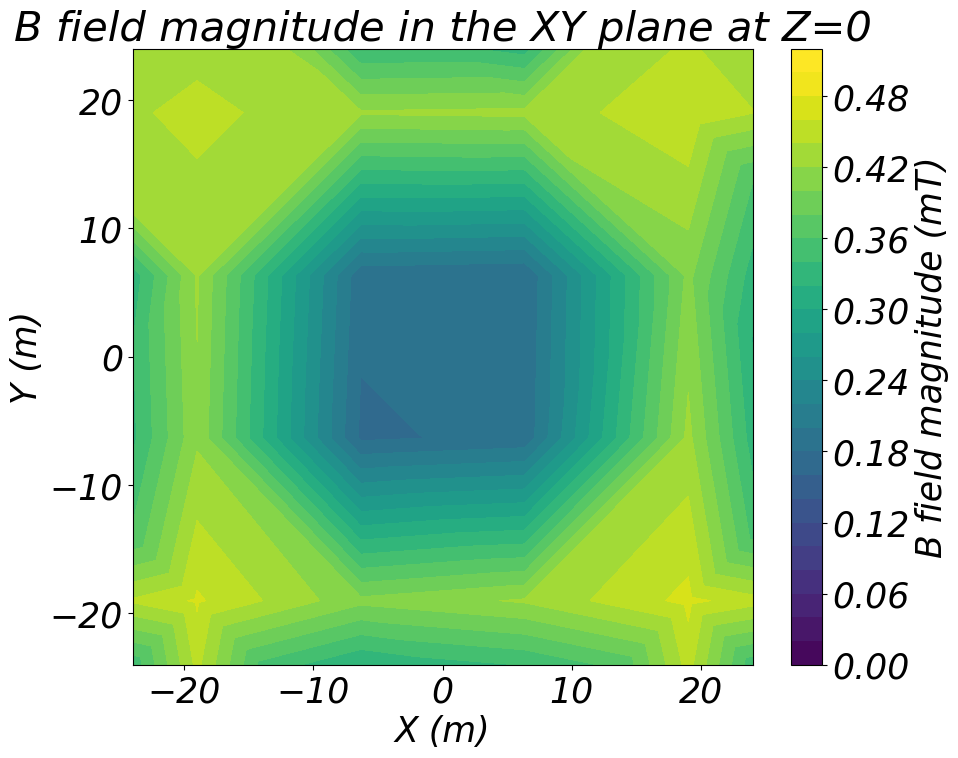

In [4]:
# Create a contour plot in the XY plane at Z=0
# Use matplotlib to create the plot

fig, ax = plt.subplots(figsize=(10, 8))


# Create a contour plot of the B field in the XY plane at Z=0
# First calculate the B field magnitude
bfield_data['B'] = np.sqrt(bfield_data['Bx']**2 + bfield_data['By']**2 + bfield_data['Bz']**2)*1000


# Find points close to Z=0 (in the range -0.1 to 0.1) and plot them
z0_data = bfield_data[(bfield_data['z'] > -25) & (bfield_data['z'] < 25)]
# z0_data = bfield_data[(bfield_data['z'] > -0.03) & (bfield_data['z'] < 0)]
# z0_data = bfield_data[(bfield_data['z'] > -0) & (bfield_data['z'] < 0.02)]
# How many points are there?
print(f'Number of points in XY plane at Z=0: {len(z0_data)}')



# Create the contour plot with the scaled B field
plt.tricontourf(z0_data['x'], z0_data['y'], z0_data['B'], cmap='viridis', levels=25, vmin=0, vmax=0.5)
plt.colorbar(label='B field magnitude (mT)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('B field magnitude in the XY plane at Z=0')   


# Zoom in
ax.set_xlim(-24, 24)
ax.set_ylim(-24, 24)

TypeError: Input z must be 2D, not 1D

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

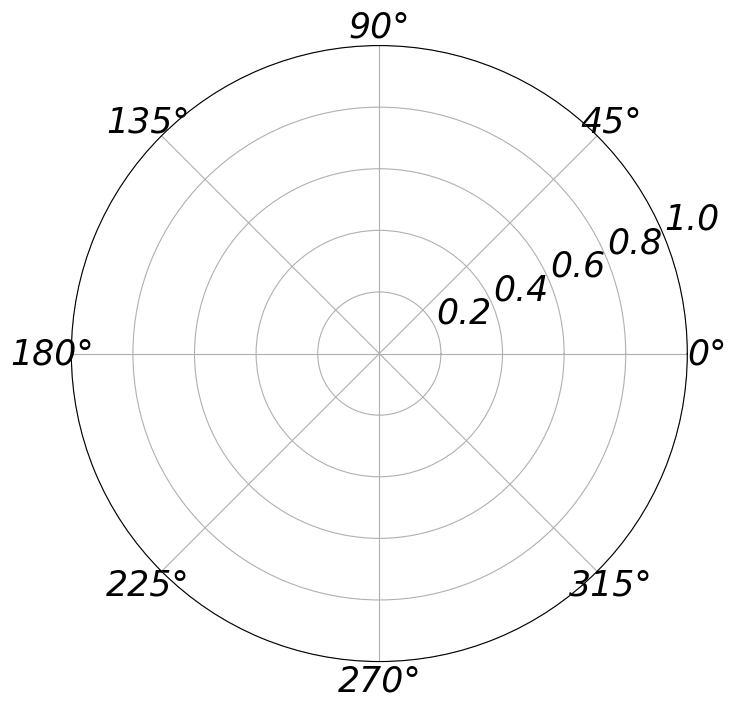

In [5]:

# Let's now add polar coordinates (converting x, y to r, theta)
bfield_data['r'] = np.sqrt(bfield_data['x']**2 + bfield_data['y']**2)
bfield_data['theta'] = np.arctan2(bfield_data['y'], bfield_data['x'])

bfield_data_z0 = bfield_data[(bfield_data['z'] > -20) & (bfield_data['z'] < 20)]

azimuths = np.unique(bfield_data_z0['theta'])
zeniths = np.unique(bfield_data_z0['r'])
r, theta = np.meshgrid(zeniths, azimuths)
values = bfield_data_z0['B'].values.reshape(-len(azimuths),)

# Let's make a polar contour plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

ax.contourf(theta, r, values, cmap='viridis', levels=25, vmin=0, vmax=0.5)
plt.colorbar(label='B field magnitude (mT)')
plt.title('B field magnitude in the XY plane at Z=0')


/tmp/ipykernel_3234/1615053169.py:34: UserWarning: The following kwargs were not used by contour: 'interpolation'
  contour = ax.contourf(Theta, R, B_interp, levels=50, cmap='viridis', interpolation='none')
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [99 97]
 [99 98]
 [99 99]]
0.1116


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

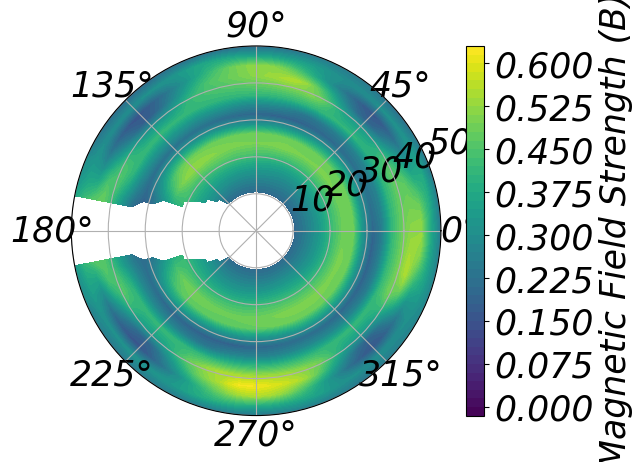

In [6]:
from scipy.interpolate import griddata

# Convert Cartesian to Polar Coordinates
bfield_data['r'] = np.sqrt(bfield_data['x']**2 + bfield_data['y']**2)
bfield_data['theta'] = np.arctan2(bfield_data['y'], bfield_data['x'])

# Filter for the desired z range
bfield_data_z0 = bfield_data[(bfield_data['z'] > -25) & (bfield_data['z'] < 25)]

# Define a polar grid
# r_vals = np.linspace(bfield_data_z0['r'].min(), bfield_data_z0['r'].max(), 100)
# print(bfield_data_z0['r'].min())
r_vals = np.linspace(0, bfield_data_z0['r'].max(), 100)
theta_vals = np.linspace(-np.pi, np.pi, 100)
R, Theta = np.meshgrid(r_vals, theta_vals)

# Interpolate B field onto the grid
B_interp = griddata(
    (bfield_data_z0['r'], bfield_data_z0['theta']),
    bfield_data_z0['B'],
    (R, Theta),
    method='cubic'
)

# Check for nans
if np.isnan(B_interp).any():
    print('Warning: NaNs in B_interp')
    print(np.argwhere(np.isnan(B_interp)))
    # Count em
    print(np.isnan(B_interp).sum() / B_interp.size)

# Create Polar Contour Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
contour = ax.contourf(Theta, R, B_interp, levels=50, cmap='viridis', interpolation='none')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

ax.set_ylim(0, 50)

# Show plot
plt.show()

/tmp/ipykernel_3234/1431516435.py:34: UserWarning: The following kwargs were not used by contour: 'interpolation'
  contour = ax.contourf(Theta, R, B_interp, levels=10, cmap='viridis', interpolation='none')
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times

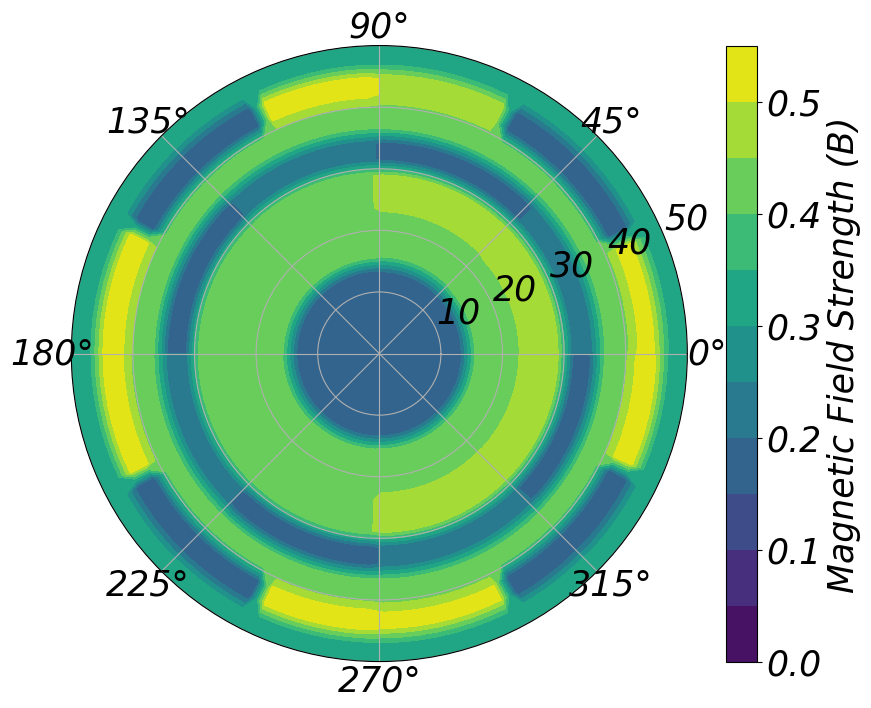

In [8]:
from scipy.interpolate import griddata

# Convert Cartesian to Polar Coordinates
bfield_data['r'] = np.sqrt(bfield_data['x']**2 + bfield_data['y']**2)
bfield_data['theta'] = np.arctan2(bfield_data['y'], bfield_data['x'])

# Filter for the desired z range
bfield_data_z0 = bfield_data[(bfield_data['z'] > -25) & (bfield_data['z'] < 25)]

# Define a polar grid
# r_vals = np.linspace(bfield_data_z0['r'].min(), bfield_data_z0['r'].max(), 100)
# print(bfield_data_z0['r'].min())
r_vals = np.linspace(0, bfield_data_z0['r'].max(), 100)
theta_vals = np.linspace(-np.pi, np.pi, 100)
R, Theta = np.meshgrid(r_vals, theta_vals)

# Interpolate B field onto the grid
B_interp = griddata(
    (bfield_data_z0['r'], bfield_data_z0['theta']),
    bfield_data_z0['B'],
    (R, Theta),
    method='nearest'
)

# Check for nans
if np.isnan(B_interp).any():
    print('Warning: NaNs in B_interp')
    print(np.argwhere(np.isnan(B_interp)))
    # Count em
    print(np.isnan(B_interp).sum() / B_interp.size)

# Create Polar Contour Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))
contour = ax.contourf(Theta, R, B_interp, levels=10, cmap='viridis', interpolation='none')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

ax.set_ylim(0, 50)

# Show plot
plt.show()

In [ ]:
bfield_data_extrapolated = bfield_data.copy()

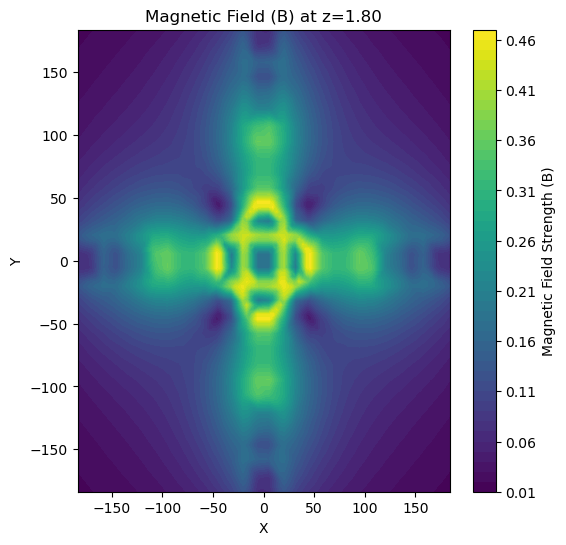

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assume bfield_data is already loaded
bfield_data_z0 = bfield_data[(bfield_data['z'] > -20) & (bfield_data['z'] < 20)].copy()

# Create a finer grid in x, y, z
x_vals = np.linspace(bfield_data_z0['x'].min(), bfield_data_z0['x'].max(), 100)
y_vals = np.linspace(bfield_data_z0['y'].min(), bfield_data_z0['y'].max(), 100)
z_vals = np.linspace(bfield_data_z0['z'].min(), bfield_data_z0['z'].max(), 10)  # Less dense in z

X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')

# Interpolate B onto the new grid
B_interp = griddata(
    (bfield_data_z0['x'], bfield_data_z0['y'], bfield_data_z0['z']),
    bfield_data_z0['B'],
    (X, Y, Z),
    method='linear'  # 'cubic' or 'nearest' can also be tried
)

# Pick a z-slice to plot (e.g., middle z-plane)
z_index = len(z_vals) // 2
B_slice = B_interp[:, :, z_index]

# Plot a normal contour plot in x-y plane
fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contourf(X[:, :, z_index], Y[:, :, z_index], B_slice, levels=50, cmap='viridis')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(f"Magnetic Field (B) at z={z_vals[z_index]:.2f}")

plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Assume bfield_data is already loaded
bfield_data_z0 = bfield_data[(bfield_data['z'] > -20) & (bfield_data['z'] < 20)].copy()

# Expand grid beyond original limits
x_min, x_max = bfield_data_z0['x'].min(), bfield_data_z0['x'].max()
y_min, y_max = bfield_data_z0['y'].min(), bfield_data_z0['y'].max()
z_min, z_max = bfield_data_z0['z'].min(), bfield_data_z0['z'].max()

expand_factor = 1.2  # Expand range by 20%
x_vals = np.linspace(x_min * expand_factor, x_max * expand_factor, 100)
y_vals = np.linspace(y_min * expand_factor, y_max * expand_factor, 100)
z_vals = np.linspace(z_min * expand_factor, z_max * expand_factor, 10)  # Less dense in z

X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')

# Extract raw data points
x_data = bfield_data_z0['x'].values
y_data = bfield_data_z0['y'].values
z_data = bfield_data_z0['z'].values
B_data = bfield_data_z0['B'].values

# Use RBF interpolation for smooth extrapolation
rbf = Rbf(x_data, y_data, z_data, B_data, function='gaussian')  # Try 'linear', 'gaussian', etc.
B_interp = rbf(X, Y, Z)

# Pick a z-slice to plot (e.g., middle z-plane)
z_index = len(z_vals) // 2
B_slice = B_interp[:, :, z_index]





,x,y,z,Bx,By,Bz,B,r,theta
12,-183.814,-183.814,-16.174655,-0.000012,-0.000012,-1.918094e-06,0.017039,259.952252,-2.356194
13,-183.814,-183.814,-9.704793,-0.000012,-0.000012,-1.158832e-06,0.017133,259.952252,-2.356194
14,-183.814,-183.814,-3.234931,-0.000012,-0.000012,-3.863727e-07,0.017181,259.952252,-2.356194
15,-183.814,-183.814,3.234931,-0.000012,-0.000012,3.904988e-07,0.017181,259.952252,-2.356194
16,-183.814,-183.814,9.704793,-0.000012,-0.000012,1.162903e-06,0.017133,259.952252,-2.356194
...,...,...,...,...,...,...,...,...,...
26983,183.814,183.814,-9.704793,0.000012,0.000012,-1.158832e-06,0.017133,259.952252,0.785398
26984,183.814,183.814,-3.234931,0.000012,0.000012,-3.863727e-07,0.017181,259.952252,0.785398
26985,183.814,183.814,3.234931,0.000012,0.000012,3.904988e-07,0.017181,259.952252,0.785398
26986,183.814,183.814,9.704793,0.000012,0.000012,1.162903e-06,0.017133,259.952252,0.785398


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

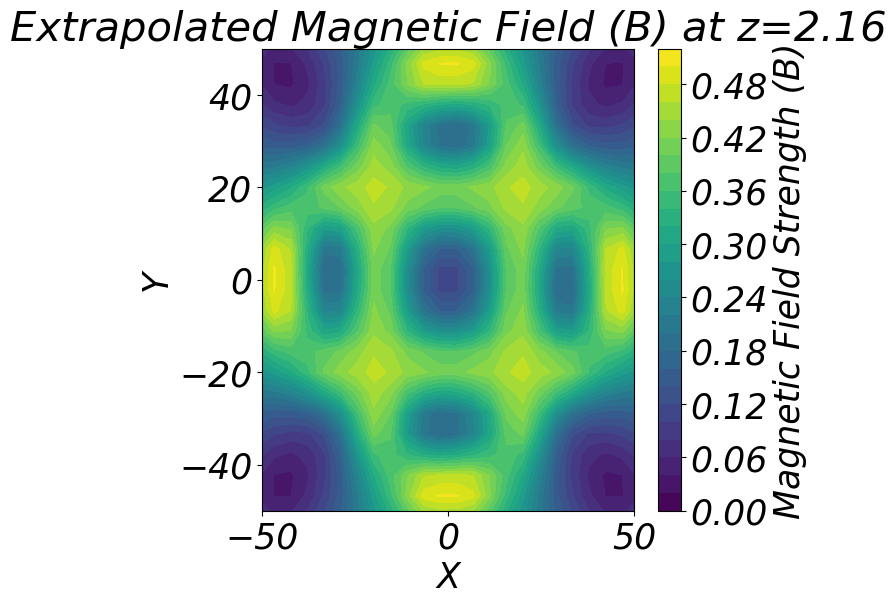

In [12]:
# Plot a normal contour plot in x-y plane
fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contourf(X[:, :, z_index], Y[:, :, z_index], B_slice, levels=25, cmap='viridis')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(f"Extrapolated Magnetic Field (B) at z={z_vals[z_index]:.2f}")


ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

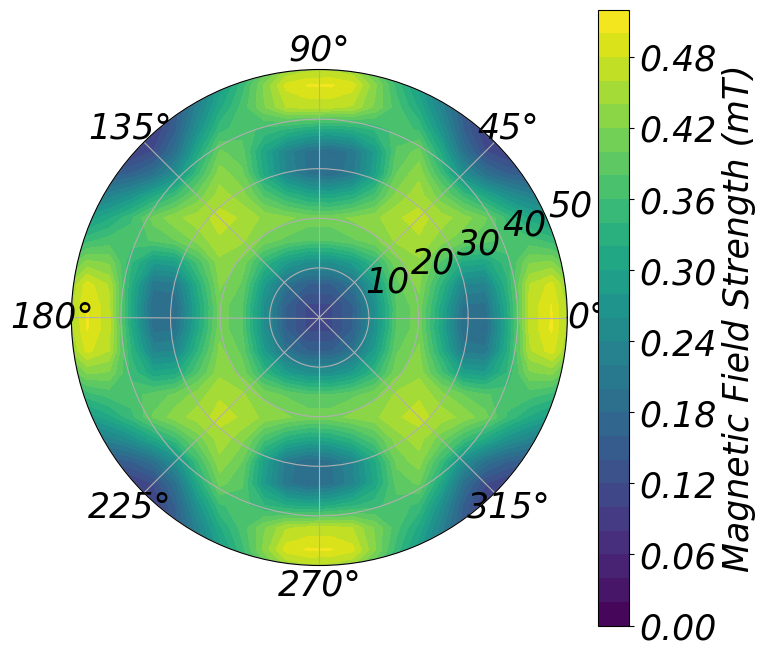

In [13]:
# Convert Cartesian (X, Y) to Polar (r, theta)
R_extrap = np.sqrt(X[:, :, z_index]**2 + Y[:, :, z_index]**2)
Theta_extrap = np.arctan2(Y[:, :, z_index], X[:, :, z_index])

# Plot polar contour
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
contour = ax.contourf(Theta_extrap, R_extrap, B_slice, levels=25, cmap='viridis')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (mT)")

# Title
# ax.set_title(f"Extrapolated Magnetic Field (B) at z={z_vals[z_index]:.2f}")

# Set radial limits
ax.set_ylim(0, 50) #np.max(R_extrap))

plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

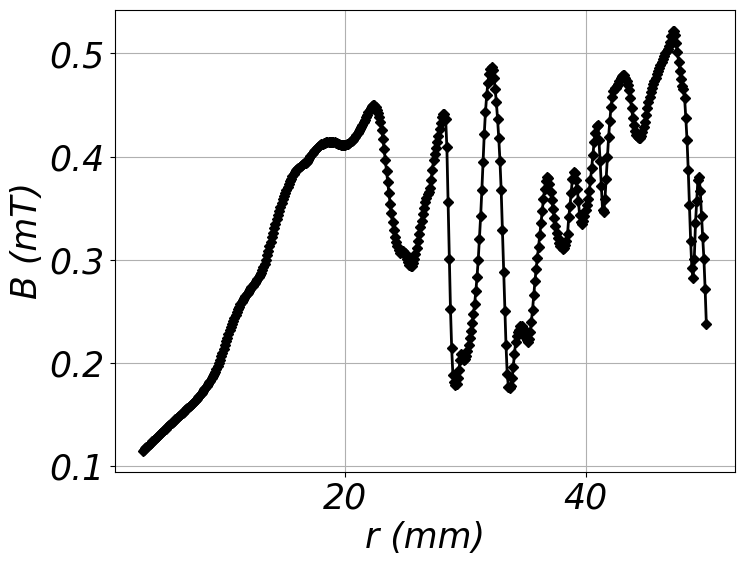

In [18]:
# Extract data for the line plot
r_line = np.linspace(0, 50, 500)  # r values from 0 to 200
theta_line = 0.5*np.pi  # Line along theta = 0 (radial direction)

# Interpolate B values along the line
B_line = griddata(
    (R_extrap.flatten(), Theta_extrap.flatten()),  # Original scattered points
    B_slice.flatten(),  # Corresponding B values
    (r_line, np.full_like(r_line, theta_line)),  # Target line
    method='cubic'
)

# Plot the line
fig, ax_line = plt.subplots(figsize=(8, 6))
ax_line.plot(r_line, B_line, label='B vs r', color='k', lw=2, ms=5) 
ax_line.set_xlabel('r (mm)')
ax_line.set_ylabel('B (mT)')
ax.set_xlim(0, 50)
# ax_line.legend()
plt.grid()
plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

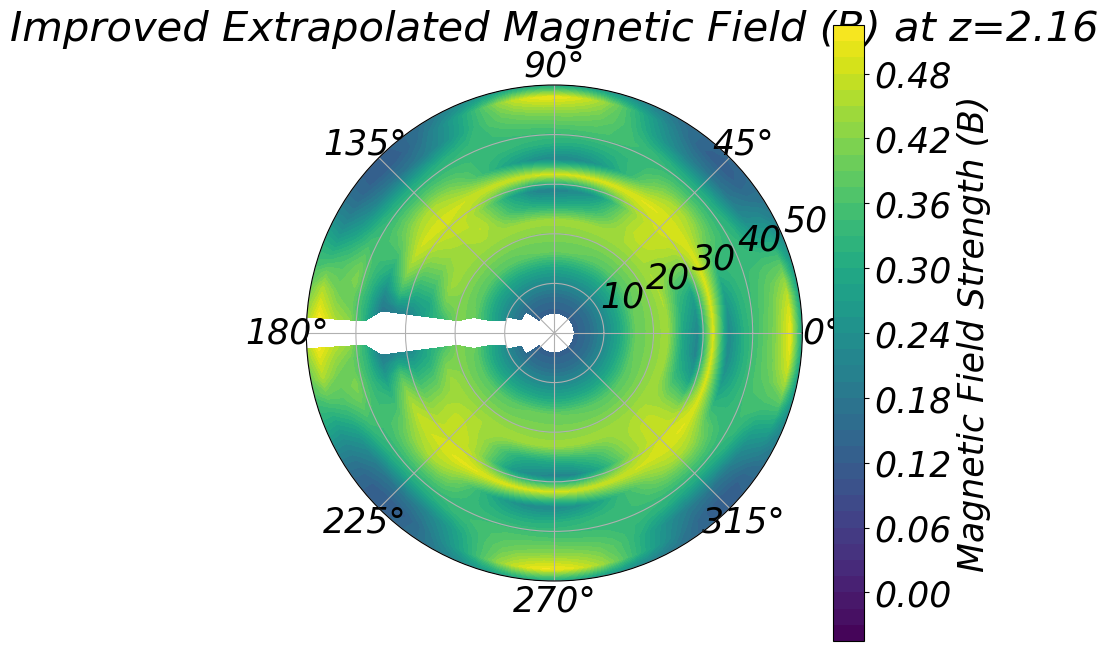

In [15]:
from scipy.interpolate import griddata

# Convert Cartesian (X, Y) to Polar (r, θ)
R_extrap = np.sqrt(X[:, :, z_index]**2 + Y[:, :, z_index]**2)
Theta_extrap = np.arctan2(Y[:, :, z_index], X[:, :, z_index])
B_polar = B_interp[:, :, z_index]  # Use the extrapolated B values

# Create a uniform polar grid
r_uniform = np.linspace(4, R_extrap.max(), 100)
theta_uniform = np.linspace(-np.pi, np.pi, 100)
R_grid, Theta_grid = np.meshgrid(r_uniform, theta_uniform)

# Interpolate B-field onto the uniform polar grid
B_uniform = griddata(
    (R_extrap.flatten(), Theta_extrap.flatten()),  # Original scattered points
    B_polar.flatten(),  # Corresponding B values
    (R_grid, Theta_grid),  # Target uniform grid
    method='cubic'  # Try 'linear' or 'nearest' if issues persist
)

# Plot polar contour
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
contour = ax.contourf(Theta_grid, R_grid, B_uniform, levels=50, cmap='viridis')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

# Title
ax.set_title(f"Improved Extrapolated Magnetic Field (B) at z={z_vals[z_index]:.2f}")

ax.set_ylim(0, 50)

plt.show()

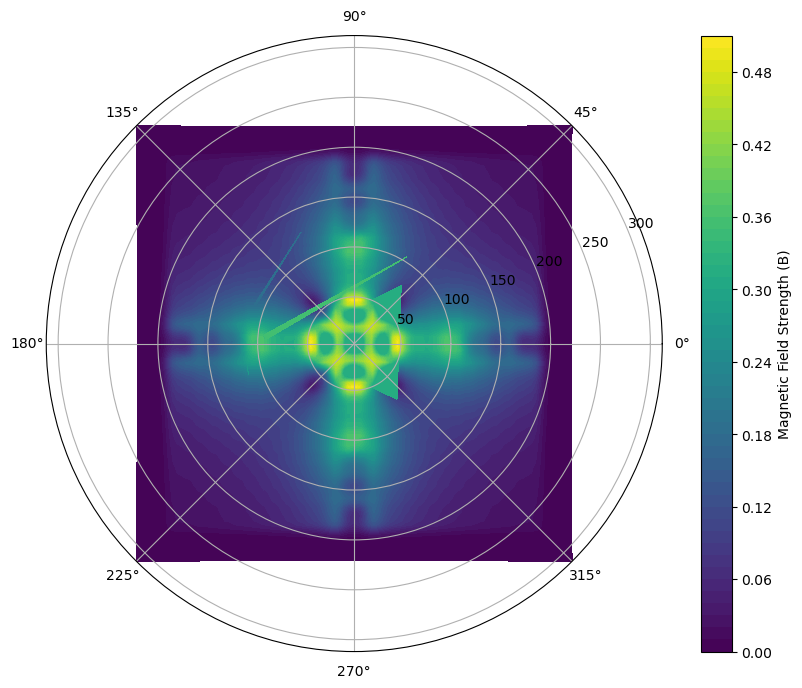

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Convert Cartesian (X, Y) to polar (r, theta)
R_extrap = np.sqrt(X[:, :, z_index]**2 + Y[:, :, z_index]**2)
Theta_extrap = np.arctan2(Y[:, :, z_index], X[:, :, z_index])
B_polar = B_interp[:, :, z_index]  # Use the extrapolated B values

# Plot polar contour
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))
contour = ax.contourf(Theta_extrap, R_extrap, B_polar, levels=50, cmap='viridis')

# Add colorbar
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

# Title
# ax.set_title(f"Extrapolated Magnetic Field (B) at z={z_vals[z_index]:.2f}")

# ax.set_ylim(0, 50)

plt.show()


In [ ]:
from scipy.interpolate import Rbf
import numpy as np

# Create a copy of the dataframe
bfield_data_extrapolated = bfield_data.copy()

# Extract x, y, z, and B field values
x_data = bfield_data['x'].values
y_data = bfield_data['y'].values
z_data = bfield_data['z'].values
B_data = bfield_data['B'].values

# Define RBF interpolators for x, y, and z
rbf_x = Rbf(x_data, y_data, z_data, function='linear')
rbf_y = Rbf(x_data, y_data, z_data, function='linear')
rbf_z = Rbf(x_data, y_data, z_data, function='linear')

# Generate a grid of points for extrapolation
x_new = np.linspace(x_data.min(), x_data.max(), 100)
y_new = np.linspace(y_data.min(), y_data.max(), 100)
x_grid, y_grid = np.meshgrid(x_new, y_new)

# Extrapolate z values using the RBF interpolator
z_extrapolated = rbf_z(x_grid, y_grid)

# Flatten the grids and create a new dataframe with extrapolated points
bfield_data_extrapolated = pd.DataFrame({
    'x': x_grid.flatten(),
    'y': y_grid.flatten(),
    'z': z_extrapolated.flatten()
})

# Optionally, you can add the extrapolated B field values if needed
bfield_data_extrapolated['B'] = rbf_x(x_grid.flatten(), y_grid.flatten())


/home/philo/anaconda3/envs/qpole_wire_stretching/lib/python3.12/site-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.80046e-71): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


(0.0, 50.0)

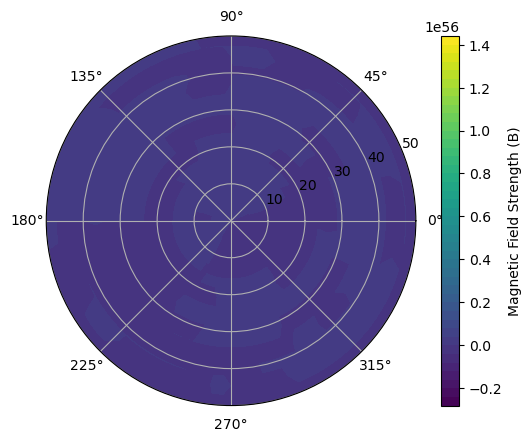

In [107]:
# Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
contour = ax.contourf(Theta, R, B_interp, levels=50, cmap='viridis',)# vmin=0, vmax=200e10)
plt.colorbar(contour, ax=ax, label="Magnetic Field Strength (B)")

ax.set_ylim(0, 50)